# Kidney Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/GUVI/project4/kidney_disease.csv")  
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [4]:
pd.set_option('display.max_columns', None) 

## Data preprocessing and cleaning

In [5]:
df.shape

(400, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.columns.tolist()

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [9]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [10]:
#the columns pcv, wc, and rc should NOT remain as object type.
# # Replace '?' or invalid entries with NaN
for col in ['pcv', 'wc', 'rc']:
    df[col] = df[col].replace('?', np.nan)

# Convert to numeric (this turns invalid strings into NaN)
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [11]:
df[['pcv', 'wc', 'rc']].dtypes


pcv    float64
wc     float64
rc     float64
dtype: object

In [12]:
# Automatically detect numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("numeric_features:", numeric_features )

# Automatically detect categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("categorical_features:", categorical_features )

numeric_features: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
categorical_features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [13]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

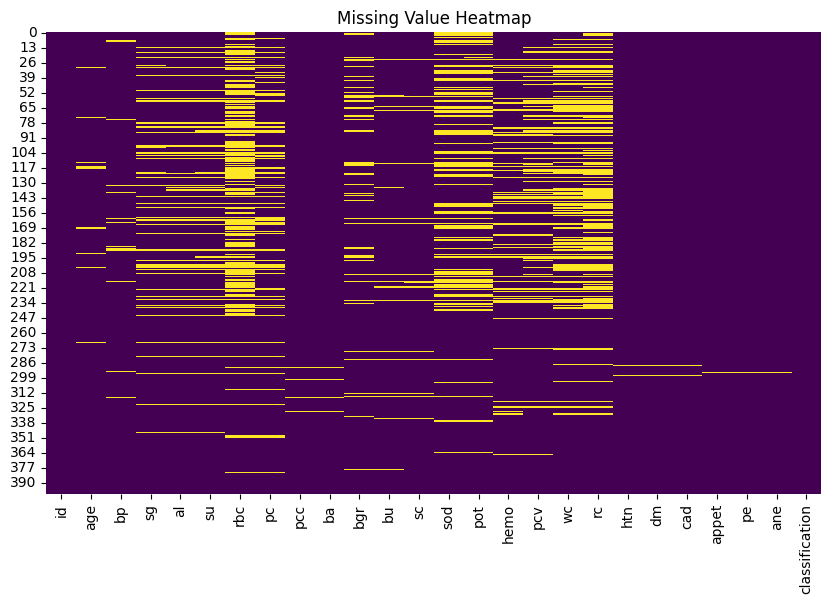

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


In [15]:
#For numeric features - using median
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

#For categorical features - using mode
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])



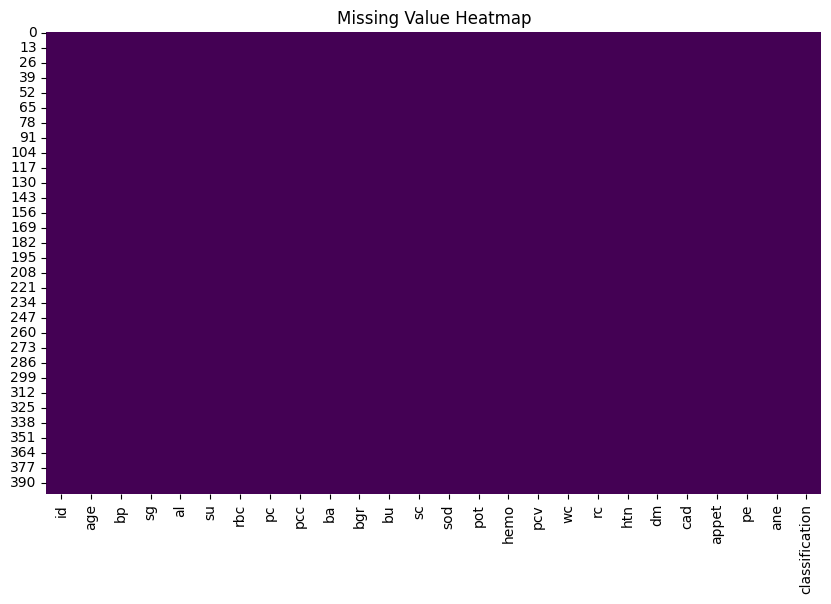

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


In [17]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(400, 26)

### EDA

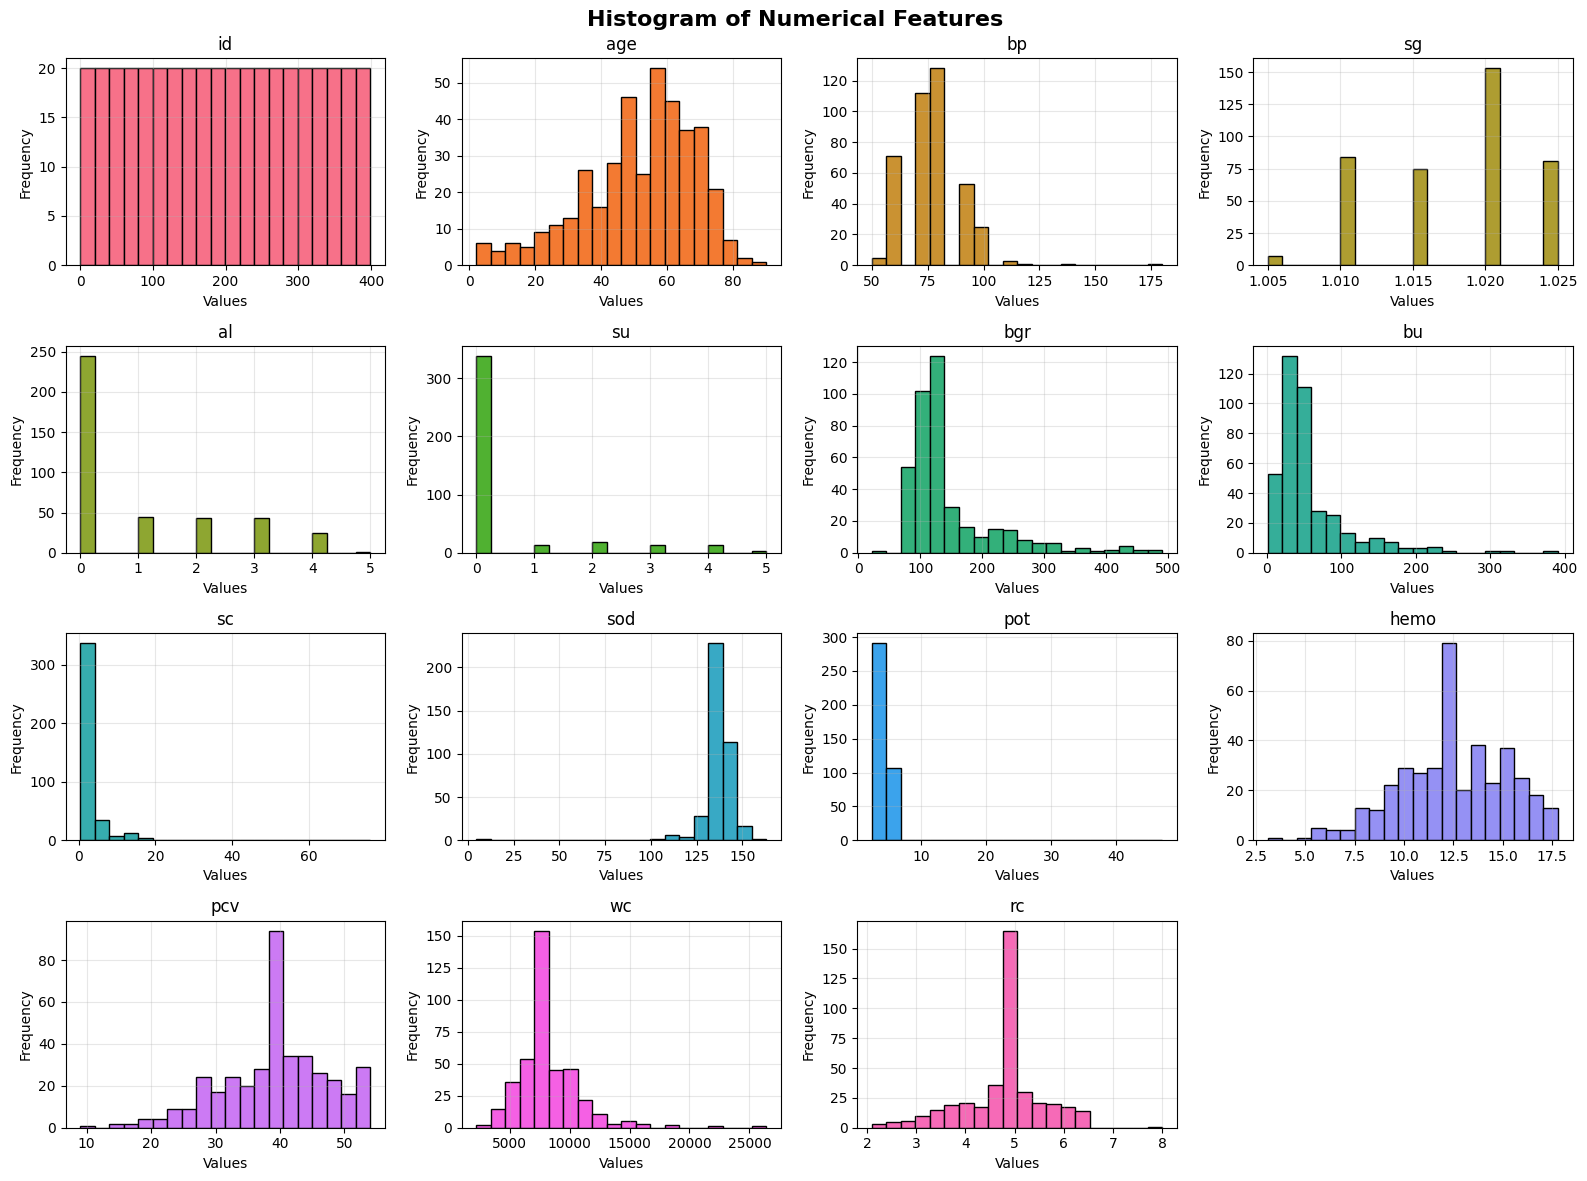

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette with unique colors
colors = sns.color_palette("husl", len(numeric_features))

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(df[col].dropna(), bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)

# Remove unused subplots
for j in range(len(numeric_features), 16):
    fig.delaxes(axes[j])

plt.suptitle("Histogram of Numerical Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


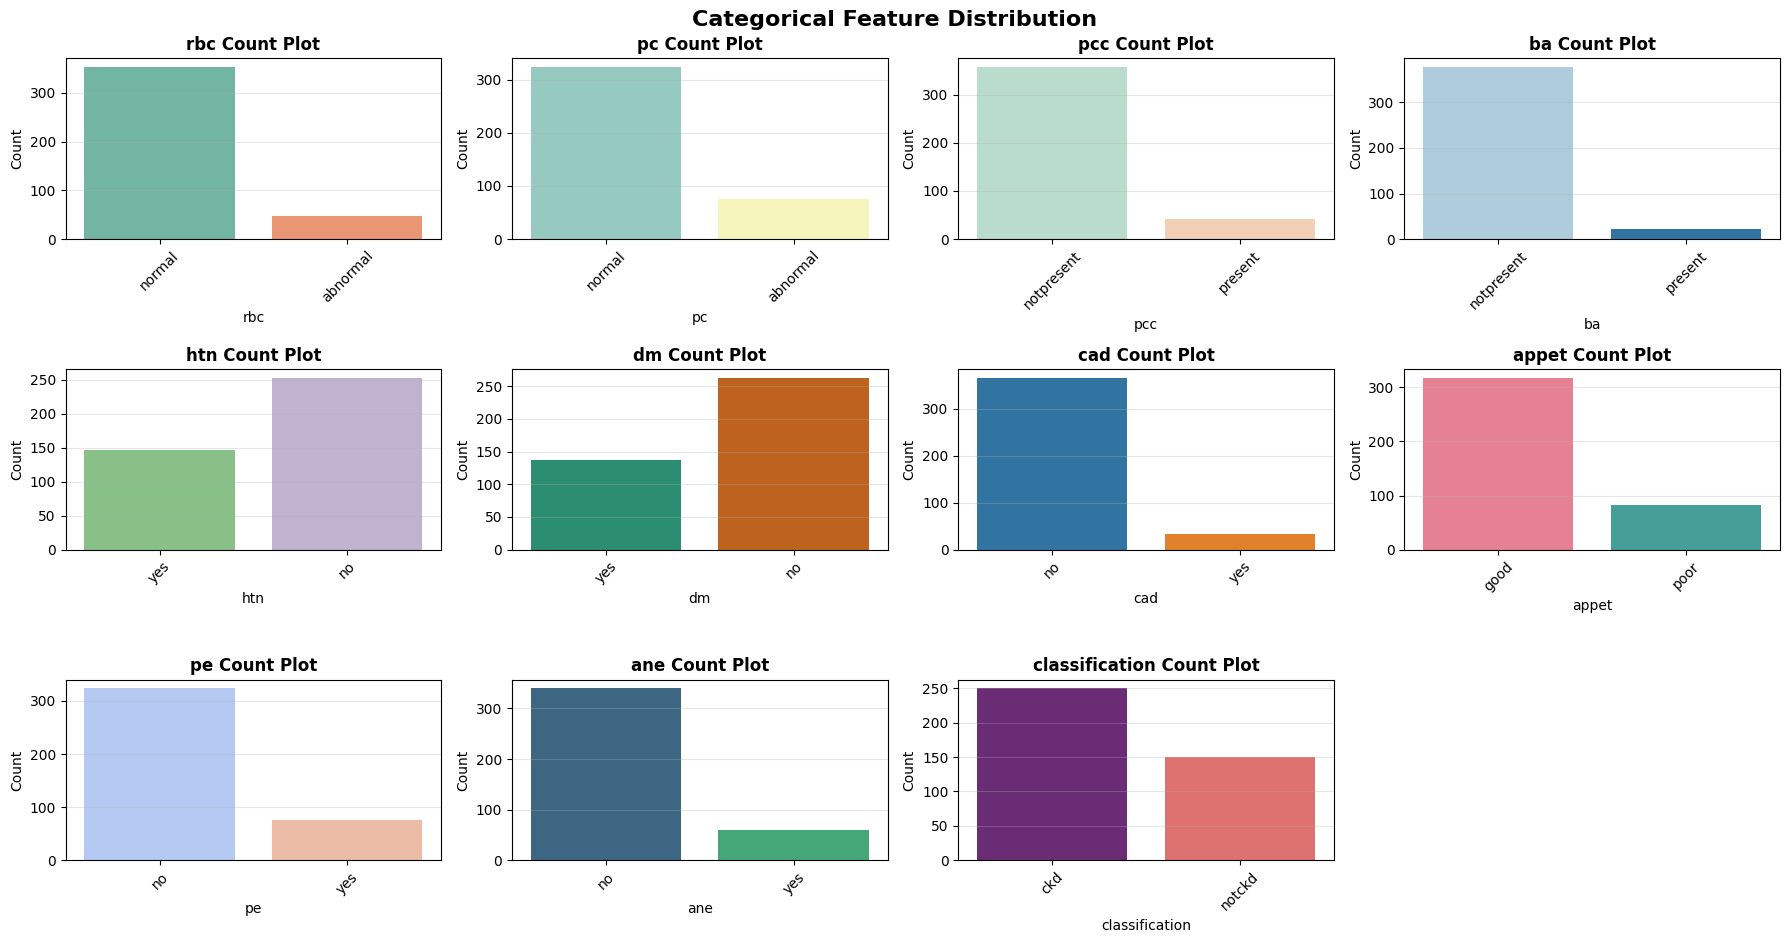

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = categorical_features

# A list of different color palettes for each plot
palettes = [
    "Set2", "Set3", "Pastel2", "Paired", 
    "Accent", "Dark2", "tab10", "husl",
    "coolwarm", "viridis", "magma", "cubehelix",
    "Blues", "Greens", "Reds", "Purples"
]

rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    # How many categories?
    unique_vals = df[col].nunique()

    # Pick a different palette for each plot
    palette = sns.color_palette(palettes[i], unique_vals)

    sns.countplot(
        data=df,
        x=col,
        hue=col,       # to avoid seaborn warnings
        palette=palette,
        ax=axes[i],
        legend=False
    )

    axes[i].set_title(f"{col} Count Plot", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

# Remove extra subplots
for j in range(len(cat_cols), rows * cols):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


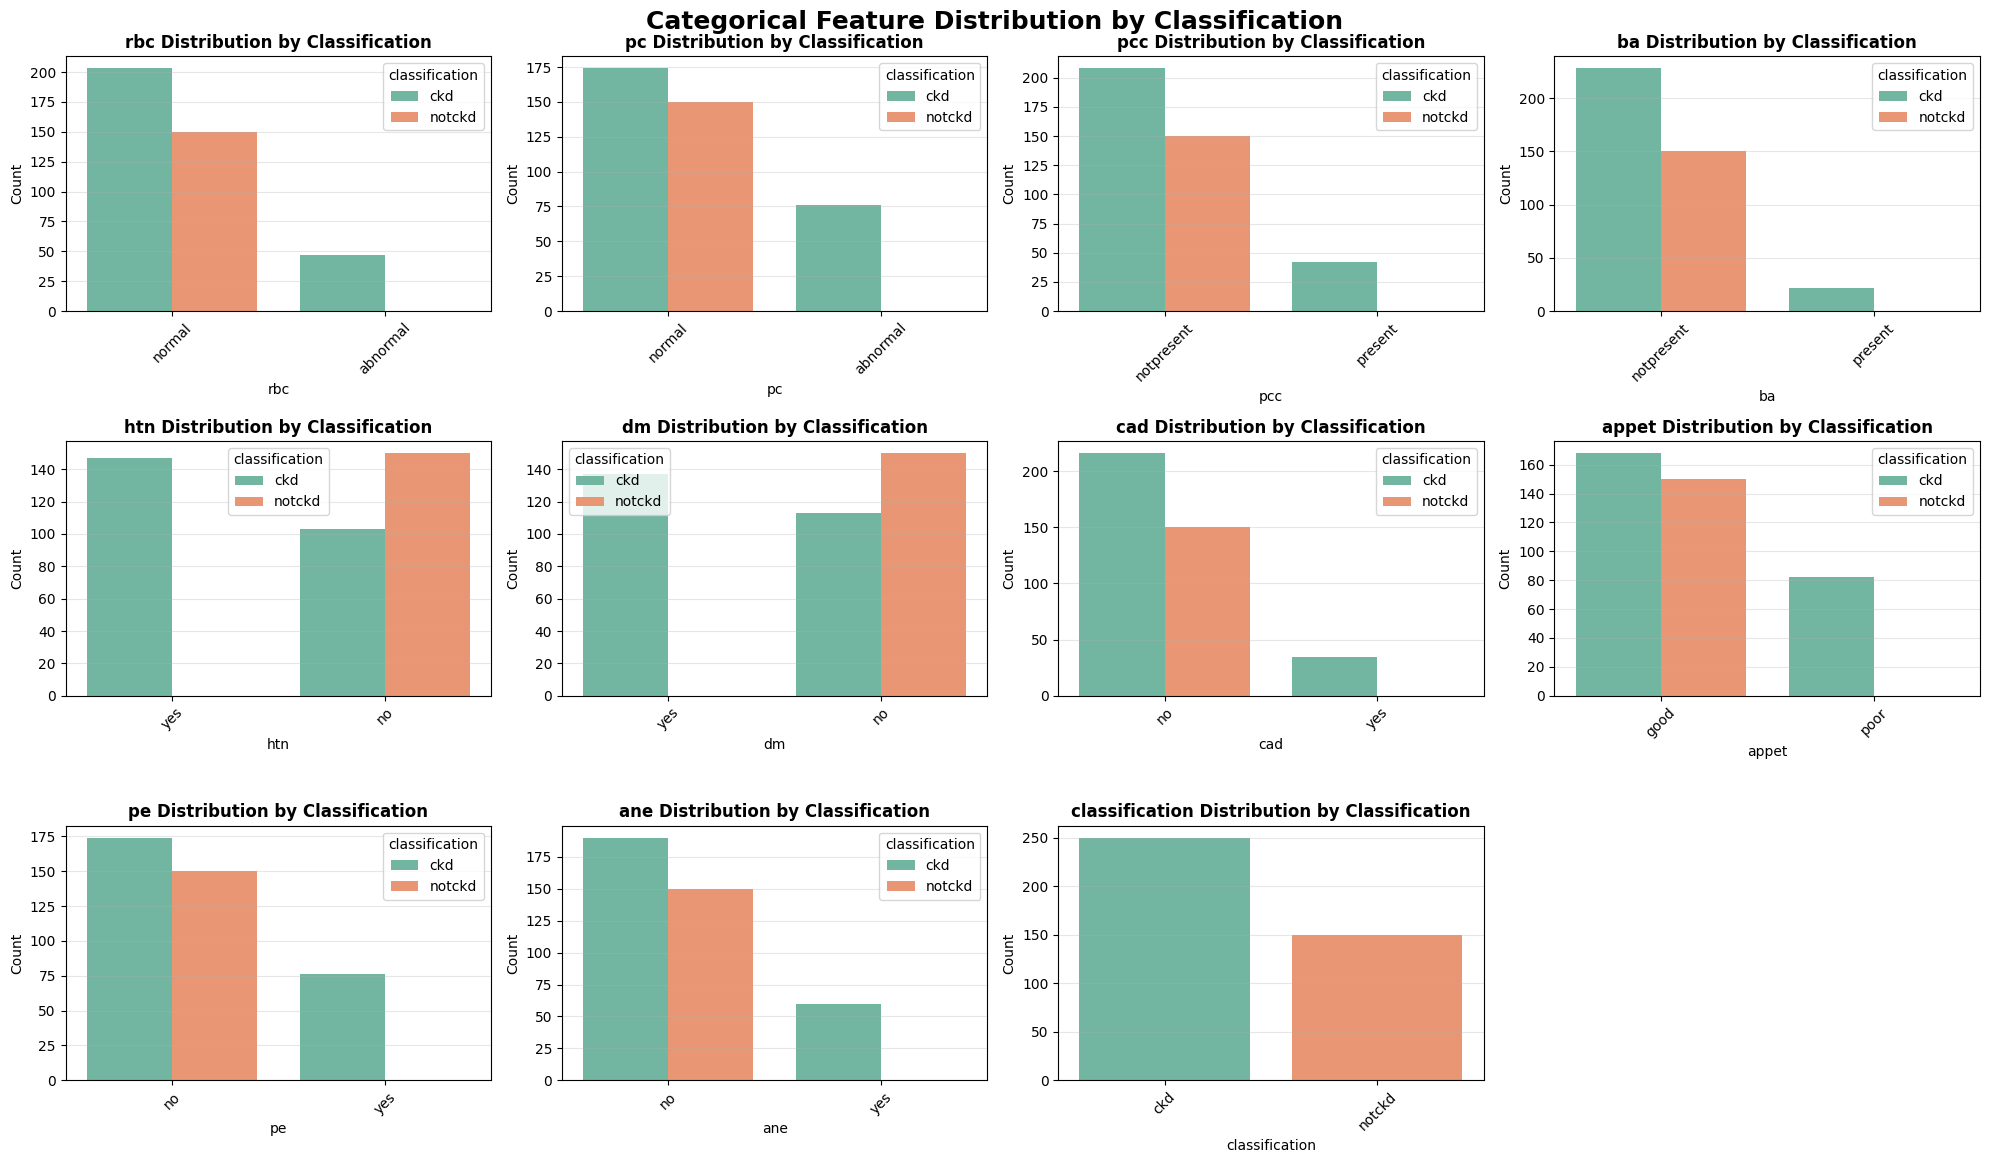

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = categorical_features

# Define grid layout
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    sns.countplot(
        data=df, 
        x=col, 
        hue='classification', 
        ax=axes[i],
        palette="Set2"
    )

    axes[i].set_title(f"{col} Distribution by Classification", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

# Remove unused subplots
for j in range(len(cat_cols), rows * cols):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distribution by Classification", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


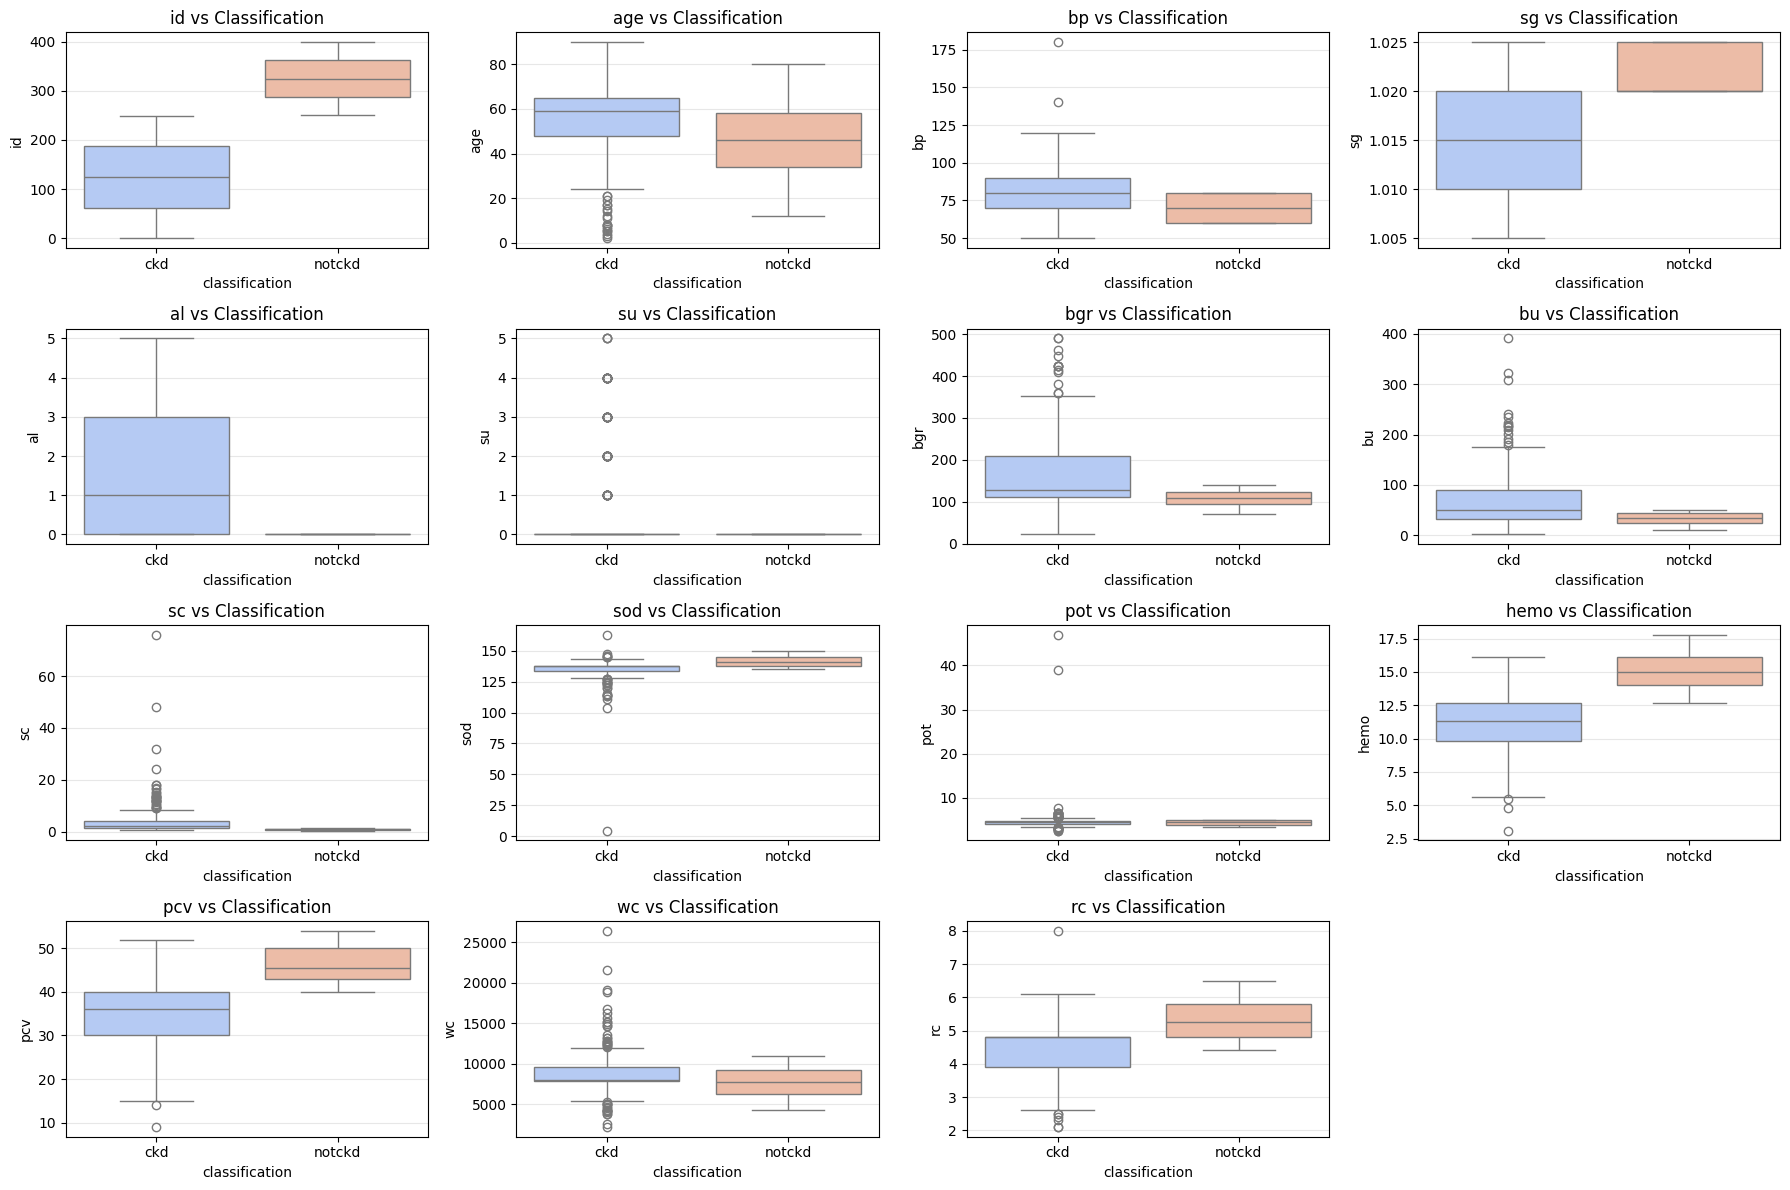

In [24]:
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):

    sns.boxplot(
        data=df,
        x='classification',
        y=col,
        hue='classification',    # Required for Seaborn future versions
        palette='coolwarm',
        ax=axes[i],
        dodge=False,
        legend=False             # Avoid repeated legends
    )

    axes[i].set_title(f"{col} vs Classification", fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

# Remove empty subplots
for j in range(len(numeric_features), rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


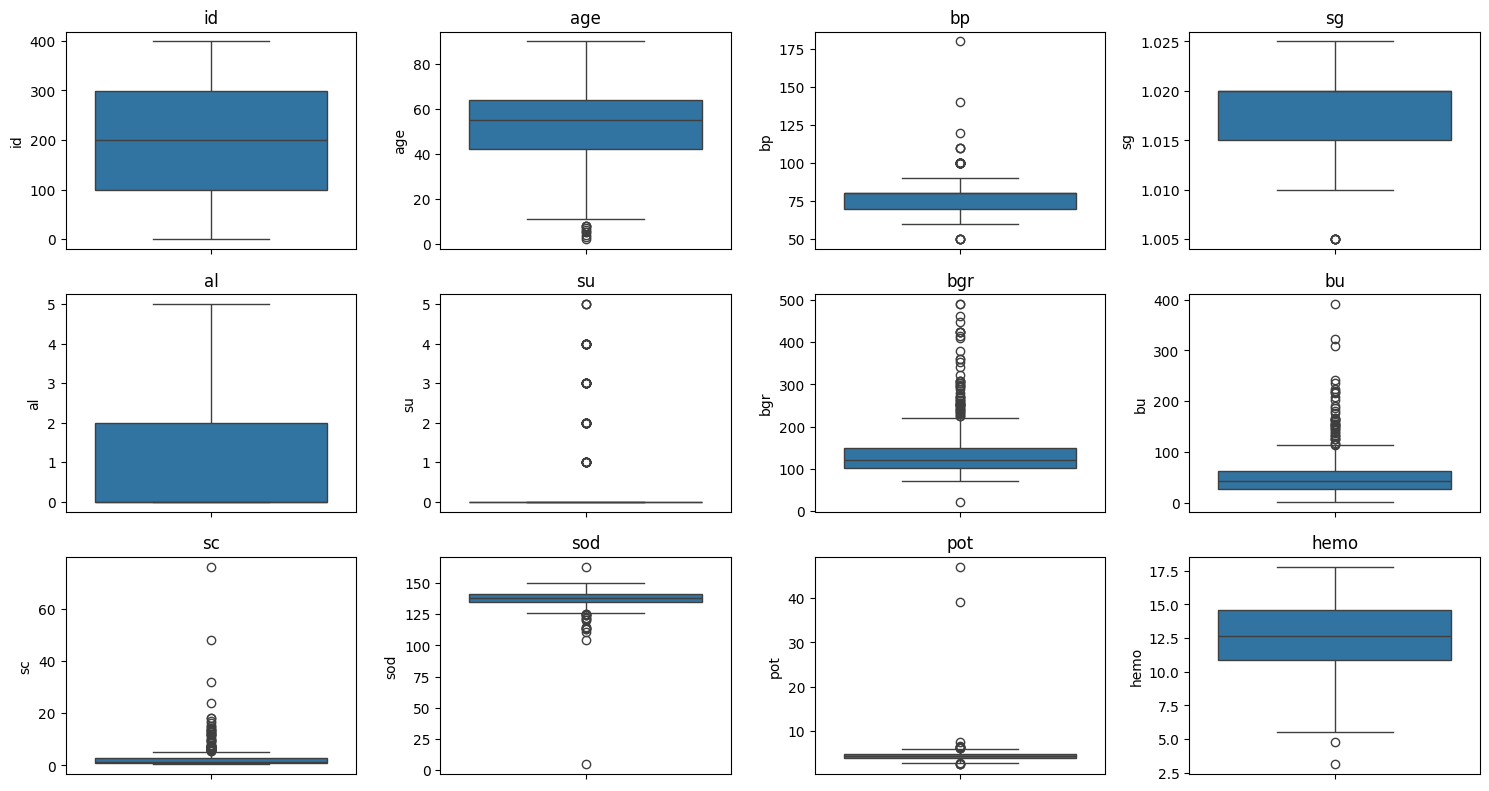

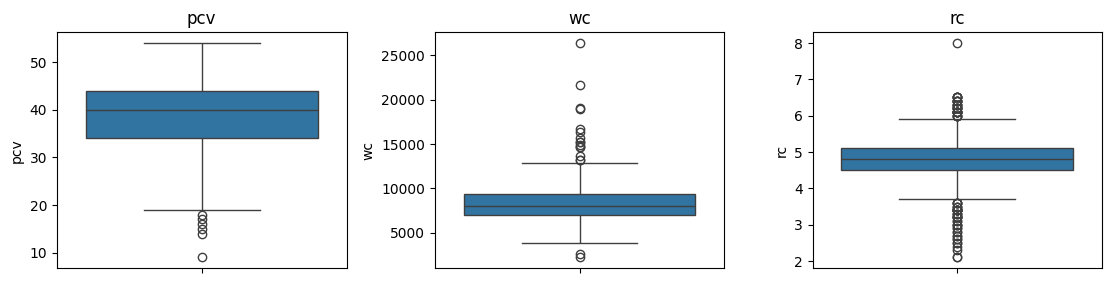

In [25]:

import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numeric_features)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numeric_features[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    
    plt.tight_layout()
    plt.show()


In [26]:
# Detecting outliers

cols_to_check = [ 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo' ]
outlier_summary = {}

for col in cols_to_check:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': len(outliers)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


      Lower_Bound  Upper_Bound  Num_Outliers
age      -63.5750     156.6250           0.0
bp         0.0000     160.0000           1.0
sg         0.9875       1.0475           0.0
al        -6.0000      10.0000           0.0
su        -4.5000       7.5000           0.0
bgr     -257.0000     639.0000           0.0
bu      -194.8000     370.0000           1.0
sc       -16.4575      28.7625           3.0
sod       97.0000     177.0000           1.0
pot        0.4800       8.5200           2.0
hemo      -5.4500      30.1500           0.0


In [27]:
import numpy as np

cols_to_cap = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

for col in cols_to_cap:
    lower = df[col].quantile(0.05)   # 5th percentile
    upper = df[col].quantile(0.95)   # 95th percentile
    
    # winsorization (cap both sides)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Capping completed for lower & upper outliers!")


Capping completed for lower & upper outliers!


In [28]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

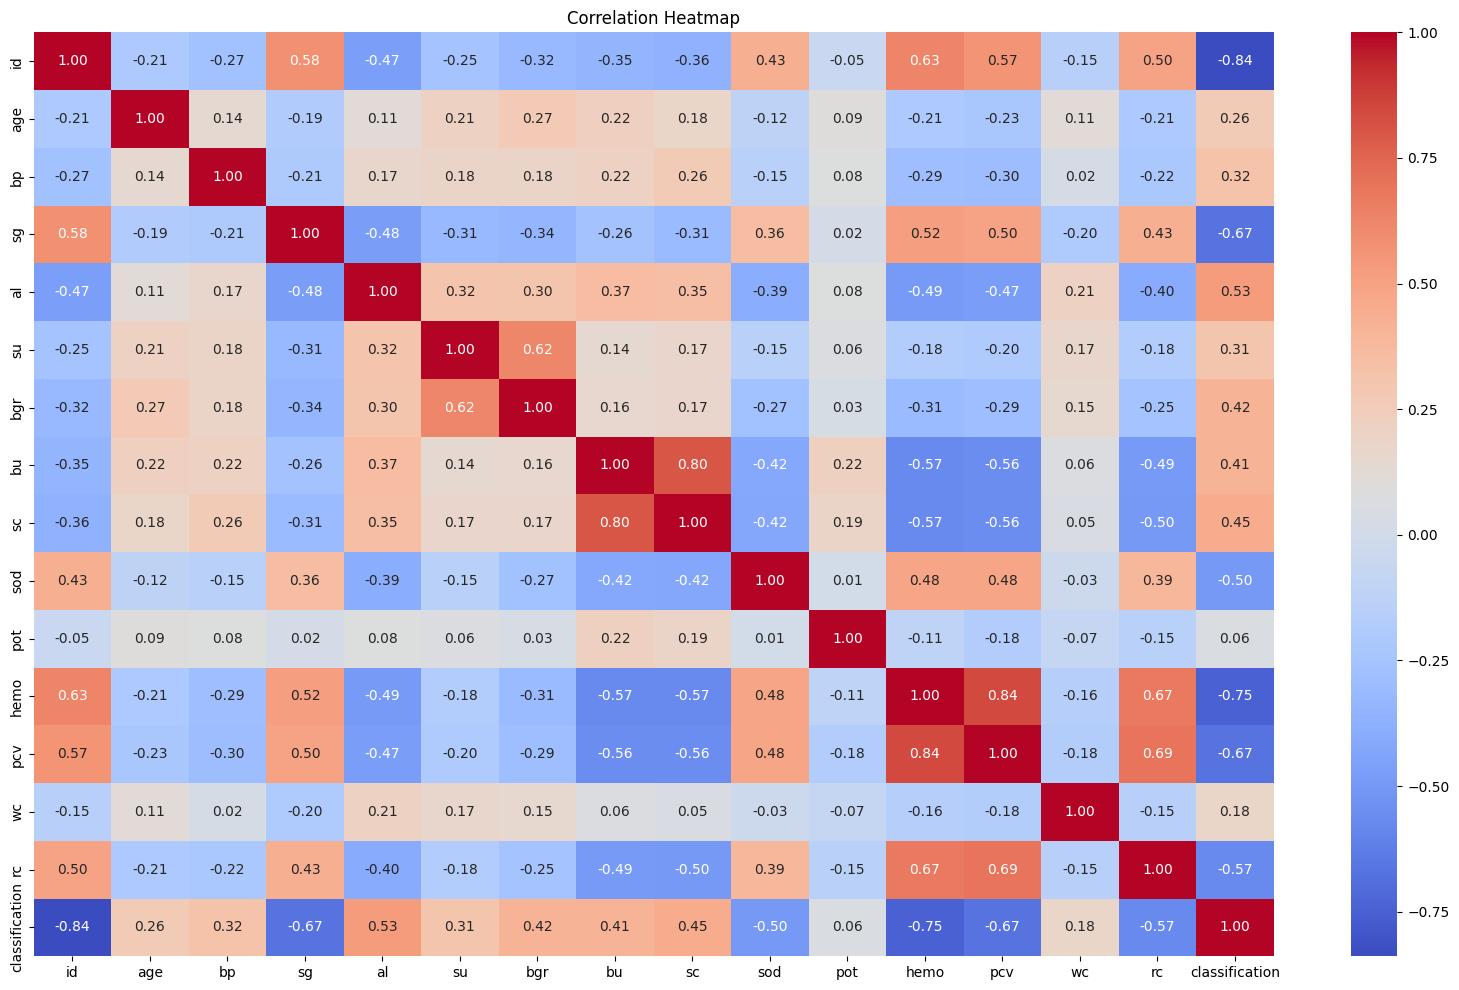

Correlation of features with CKD Classification:
classification    1.000000
al                0.532882
sc                0.449792
bgr               0.415390
bu                0.414561
bp                0.321301
su                0.307401
age               0.260977
wc                0.177571
pot               0.056480
sod              -0.497370
rc               -0.566163
sg               -0.667678
pcv              -0.673129
hemo             -0.750352
id               -0.838528
Name: classification, dtype: float64


In [29]:
# Convert Dataset to numeric for correlation
# Map the labels first
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# Now compute correlation
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Correlation of features with CKD Classification:")
print(df_numeric.corr()['classification'].sort_values(ascending=False))


In [30]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [31]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))


cramers_results = {}

for col in categorical_cols:
    cramers_results[col] = cramers_v(df[col], df['classification'])

cramers_results = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])
cramers_results = cramers_results.sort_values(by='CramersV', ascending=False)

print(cramers_results)


       CramersV
htn    0.585082
dm     0.553619
appet  0.386945
pc     0.368573
pe     0.368573
ane    0.318165
rbc    0.274624
pcc    0.256890
cad    0.226830
ba     0.175545


In [32]:
df['id'].nunique()

400

In [33]:
df['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

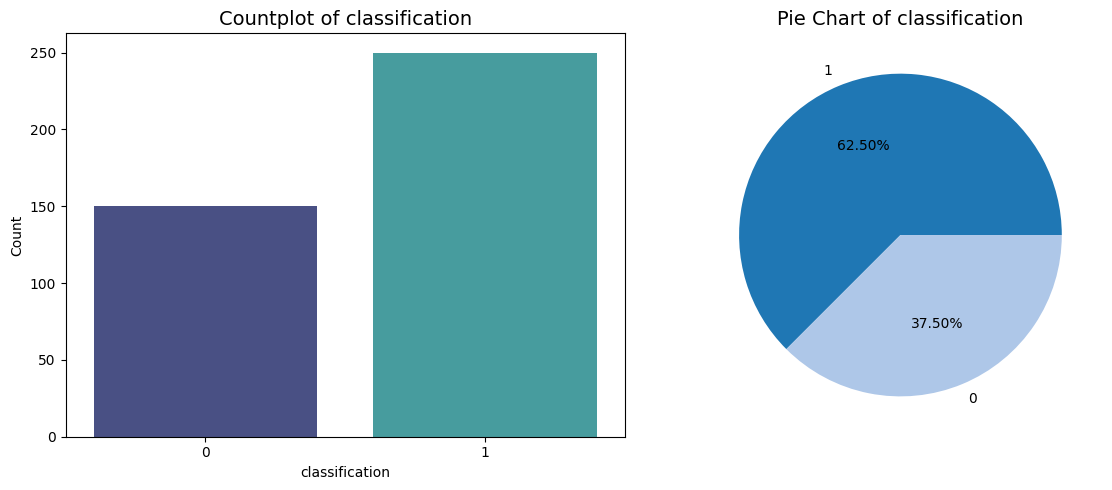

In [34]:
# Countplot and Piechart for classification 

categorical_cols = ['classification']  # you can add more categorical columns here
#palettes = ['mako', 'rocket', 'crest', 'viridis', 'coolwarm']  # new palette choices
palettes=[ "tab10",
    "tab20",
    "Paired",
    "Accent",
    "Dark2"]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Countplot with a new color from palette
count_colors = sns.color_palette(palettes[0], n_colors=df['classification'].nunique())
sns.countplot(
    x='classification',
    hue='classification',  # explicitly assign hue
    data=df,
    palette='mako',
    legend=False,     # optional, hides duplicate legend
    ax=axes[0]
)

axes[0].set_title('Countplot of classification', fontsize=14)
axes[0].set_xlabel('classification')
axes[0].set_ylabel('Count')

# Pie chart with a different palette
pie_colors = sns.color_palette(palettes[1], n_colors=df['classification'].nunique())
df['classification'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    colors=pie_colors,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title('Pie Chart of classification', fontsize=14)

plt.tight_layout()
plt.show()


In [35]:
df.to_csv('D:/GUVI/project4/kidney_disease_cleaned.csv', index=False)


## Machine learning model development

Predict the Kidney disease

Target variable - classification

In [36]:
# Load dataset
# ---------------------------
df = pd.read_csv('D:/GUVI/project4/kidney_disease_cleaned.csv')

In [37]:
from sklearn.model_selection import train_test_split
# Feature & target
# ---------------------------
Feature_Names = ['sc','al','bu','bgr','bp','age','su','wc','htn','dm','appet','pc']

X = df[Feature_Names].copy()
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


In [38]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [40]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', None)  # placeholder
])


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Custom scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

results = []

for name, model in models.items():
    pipeline.set_params(model=model)

    scores = {}
    for metric_name, metric in scoring.items():
        score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=metric).mean()
        scores[metric_name] = score
    
    results.append([
        name,
        scores['accuracy'],
        scores['precision'],
        scores['recall'],
        scores['f1'],
        scores['roc_auc']
    ])

df_results = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
)

print(df_results)


                 Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.946875    1.00000   0.915  0.955358  0.984375
1        Random Forest  0.968750    0.99500   0.955  0.971728  0.995833
2                  SVM  0.940625    1.00000   0.905  0.949738  0.983750
3                  KNN  0.909375    1.00000   0.855  0.921021  0.953750
4              XGBoost  0.946875    0.96572   0.950  0.956498  0.988542


Accuracy Score: 0.9875

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix (raw numbers):
 [[30  0]
 [ 1 49]]

Detailed Confusion Matrix:
True Negative (TN): 30
False Positive (FP): 0
False Negative (FN): 1
True Positive (TP): 49


<Figure size 600x400 with 0 Axes>

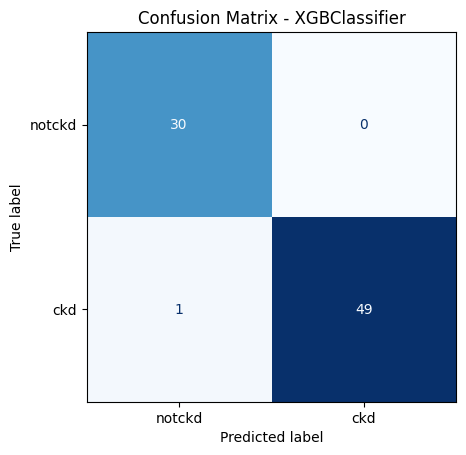

In [43]:
pipeline.set_params(model=XGBClassifier())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    ConfusionMatrixDisplay
)

# --- Accuracy ---
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


# --- Classification report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



# --- Confusion Matrix (numeric) ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (raw numbers):\n", cm)

# --- Detailed Confusion Matrix with labels ---
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Confusion Matrix:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# --- Pretty plotted Confusion Matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["notckd", "ckd"])
plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - XGBClassifier")
plt.show()



AUROC: 0.9907


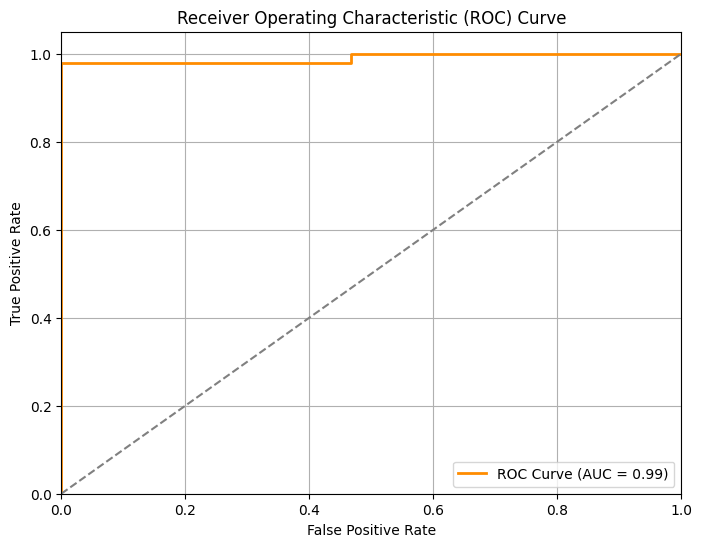

In [44]:

from sklearn.metrics import (roc_curve, auc)
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

#  AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.9, 1.0]
}

grid = GridSearchCV(
    pipeline.set_params(model=XGBClassifier(eval_metric='logloss')),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Save best pipeline
best_pipeline = grid.best_estimator_

joblib.dump({
    'pipeline': best_pipeline,
    'numeric_features': num_cols,
    'categorical_features': cat_cols,
    'feature_names': Feature_Names
}, "kidney_pipeline.joblib")

print("kidney_pipeline saved successfully!")



Best Hyperparameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best F1 Score: 0.9643209876543211
kidney_pipeline saved successfully!


🧪 Accuracy: 0.9875

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



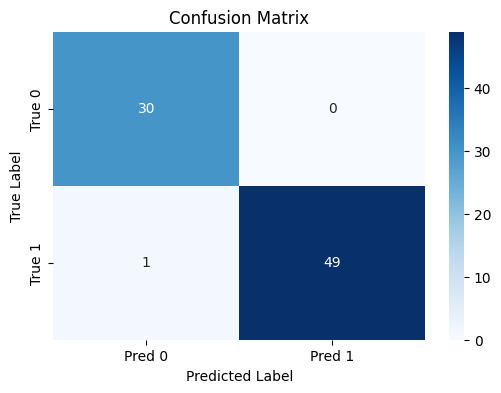


🔵 AUROC Score: 0.9933


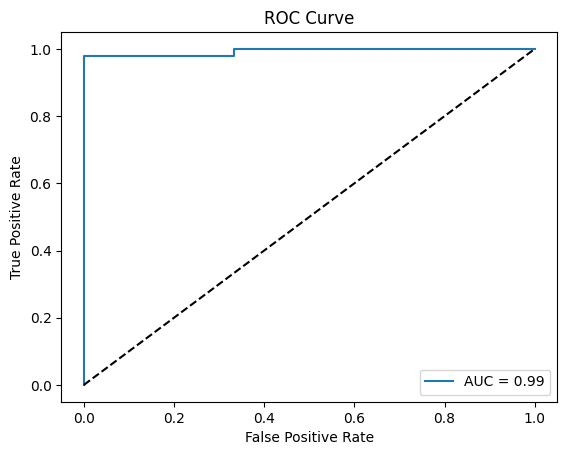

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Predict on Train & Test Data
# -----------------------------
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# -----------------------------
# 2️⃣ Accuracy
# -----------------------------
Accuracy = accuracy_score(y_test, y_test_pred)

print(f"🧪 Accuracy: {Accuracy:.4f}")

# -----------------------------
# 3️⃣ Classification Report
# -----------------------------
print("\n📋 Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# 4️⃣ Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# -----------------------------
# 5️⃣ AUROC Score
# -----------------------------
if hasattr(best_pipeline, "predict_proba"):
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_test_proba)
    print(f"\n🔵 AUROC Score: {auroc:.4f}")

    # Optional ROC Curve Plot
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("⚠️ AUROC cannot be calculated because model does not support probability predictions.")
